In [1]:
import numpy #需要π，还有一些计算模块
n=1 #基态
a=1e-10 #势阱宽度
m=9.1e-31 #电子质量
hbar=1.05e-34 #约化普朗克常数


# 量子力学背景下，我们通常不讨论粒子在势阱内的周期，不过根据粒子在能级间的跃迁，如光子的吸收，发射，跃迁的频率与能极差有关，v=ΔE/h，所以我们可以计算出基态的周期
T = 2*numpy.pi / (n**2 * numpy.pi**2 * hbar / (2*m*a**2))  # 周期
print("周期是",T,"s")

周期是 1.1034742721038077e-16 s



$$ E_n = \frac{{n^2 \pi^2 \hbar^2}}{{2 m a^2}} $$
$$ v = \frac{{\Delta E}}{h} $$
$$ T = \frac{{2\pi}}{{n^2 \pi^2 \hbar / (2m a^2)}} $$

由结果可见周期非常小，为取得更好计算的数值，将统一时间单位规定为： $$ \tau = \frac {{\hbar}}{{m a^2}}t $$
并在后续规定 $ a = 1m $

### 编辑本征态

取得 $ x = 0 $ 到 $ x = a = 1 $

In [24]:
spacing = 0.00001 #空间分辨率
a_0=0 #势阱左边界
a_1 = 1 #势阱右边界
a = a_1 - a_0 #势阱宽度
x = numpy.arange(a_0,a_1,spacing) #空间范围
N = len(x) #空间点数
x

array([0.0000e+00, 1.0000e-05, 2.0000e-05, ..., 9.9997e-01, 9.9998e-01,
       9.9999e-01])

In [15]:
# 无限深势阱的波函数
def psi_n_x(x,n):
    return numpy.sqrt(2/a)*numpy.sin(n*numpy.pi*x/a) #波函数，数值方法估算

$$ \psi_n(x) $$

In [16]:
def norm(dx,f):
    return dx*numpy.dot(f,numpy.conjugate(f)) #计算波函数模平方的数值积分

Norm of psi_test =  1.0000000000000002


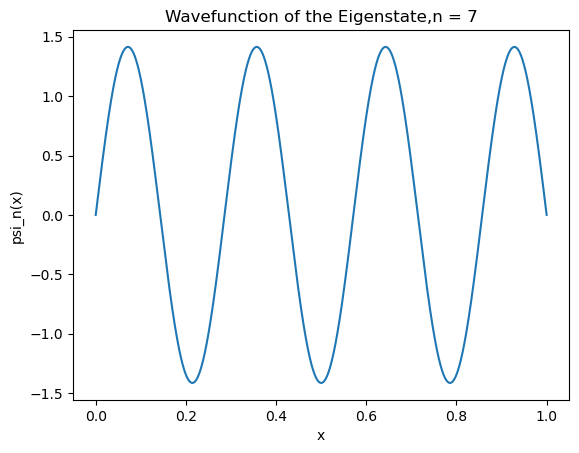

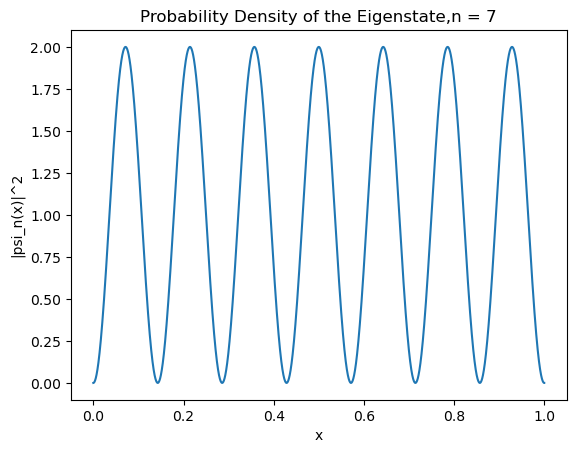

In [21]:
import matplotlib
import matplotlib.pyplot as plt

n=7 #可以测不同激发态
psi_test= psi_n_x(x,n)
print("Norm of psi_test = ",norm(spacing,psi_test))

plt.plot(x,psi_test)
plt.xlabel('x')
plt.ylabel('psi_n(x)')
plt.title(f"Wavefunction of the Eigenstate,n = {n}")

plt.figure() #上新的图，避免覆盖
plt.plot(x,psi_test*numpy.conjugate(psi_test))
plt.xlabel('x')
plt.ylabel('|psi_n(x)|^2')
plt.title(f"Probability Density of the Eigenstate,n = {n}")

plt.show()




$$ \Psi(x,\tau)=\sum_{n=1}^{\infty} c_n \psi_n(x,\tau)$$
$$\psi_n(x,\tau)=\psi_n(x)e^{-in^2\pi^2\tau/2}$$
$$\sum_{n=0}^{\infty}|c_n|^2=1$$

In [6]:
# 含时波函数
def psi_n_x_t(x,n,t):
    return psi_n_x(x,n)*numpy.exp(-1j*n**2*numpy.pi**2*t/2)

In [7]:
# 叠加态波函数
def wavefunction(x,t,cn):
    
    # 确保归一化
    total_probability=numpy.dot(numpy.conjugate(cn),cn)
    if(not abs(total_probability-1)<1e-10):
        raise ValueError(f'出错，波函数系数的模平方之和不是1，而是{total_probability}')
    
    # 
    wf=numpy.zeros_like(x) #这里的x是一个numpy数组，所以numpy.zeros_like(x)是一个和x一样大小的数组，但是里面的元素都是0
    for n in range(0,len(cn)):
        wf=wf+cn[n]*psi_n_x_t(x,n+1,t)  #这里的n+1是因为一维无限深势阱的基态是1，而cn的下标是从0开始的
    return wf 

In [8]:
# 构造系数
cn=numpy.array([numpy.sqrt(1./4), numpy.sqrt(1./4),0,numpy.sqrt(1./4),0, numpy.sqrt(1./4),0])

In [25]:
import matplotlib.animation as animation

